<a href="https://colab.research.google.com/github/Lukem121/Simple-Stock-Prediction/blob/master/Stock_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#Enter your own ticker symbol and run to predict your stock of choice!
ticker_symbol = "TSLA"

In [0]:
# Libaries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [90]:
df = web.DataReader('ticker_symbol', data_source = 'yahoo', start='2012-01-01', end='2020-02-01')
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,29.500000,27.650000,28.940001,28.080000,928100,28.080000
2012-01-04,28.670000,27.500000,28.209999,27.709999,630100,27.709999
2012-01-05,27.930000,26.850000,27.760000,27.120001,1005500,27.120001
2012-01-06,27.790001,26.410000,27.200001,26.910000,986300,26.910000
2012-01-09,27.490000,26.120001,27.000000,27.250000,897000,27.250000
...,...,...,...,...,...,...
2020-01-27,564.440002,539.280029,541.989990,558.020020,13608100,558.020020
2020-01-28,576.809998,558.080017,568.489990,566.900024,11788500,566.900024
2020-01-29,589.799988,567.429993,575.690002,580.989990,17801500,580.989990


In [91]:
#Number of rows and columns
df.shape

(2033, 6)

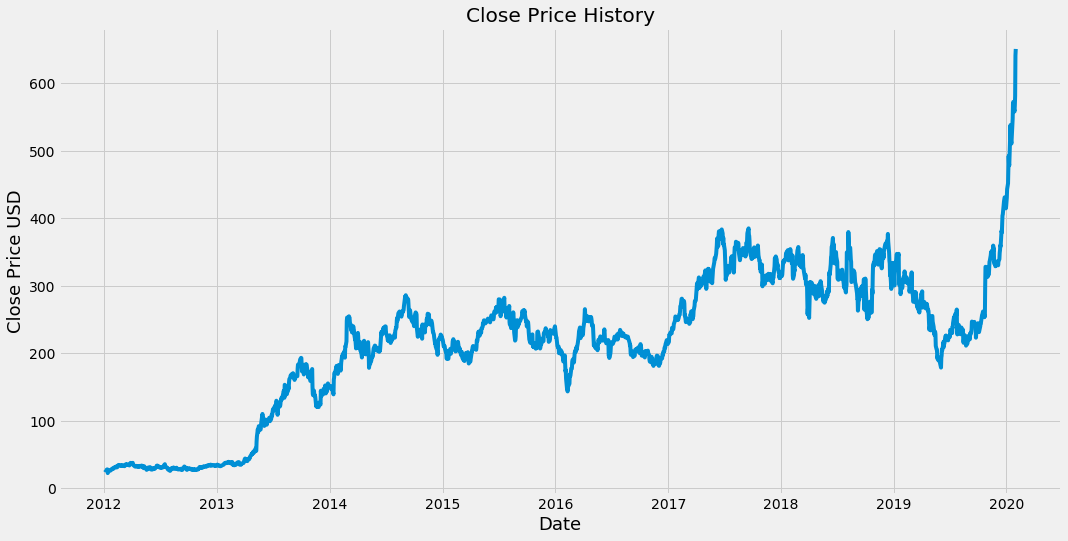

In [92]:
#Visualize
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD', fontsize=18)
plt.show()


In [93]:
#New dataframe only close column
data = df.filter(['Close'])

#Covert dataframe to numpy array
dataset = data.values

#Get number of rows to train model
training_data_len = math.ceil(len(dataset) * .8)

training_data_len


1627

In [0]:
#Scale data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)


In [95]:
#Making data set
train_data = scaled_data[0:training_data_len, :]

#Split the data
x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i,0])
  if i<= 60:
    print(x_train)
    print(y_train)
    print()

[array([0.00842652, 0.00783714, 0.00689732, 0.00656281, 0.0071044 ,
       0.00769378, 0.00866545, 0.00869731, 0.        , 0.006069  ,
       0.00640351, 0.00632387, 0.006069  , 0.0063398 , 0.00737519,
       0.0082513 , 0.00979642, 0.01041766, 0.01079996, 0.0100035 ,
       0.01081589, 0.01188314, 0.01331676, 0.01435216, 0.01403358,
       0.01455924, 0.01559464, 0.01323712, 0.01385836, 0.01653445,
       0.0172194 , 0.0181433 , 0.0194017 , 0.01865303, 0.01820702,
       0.01870082, 0.01745834, 0.01725126, 0.01755392, 0.01691675,
       0.01850967, 0.01792029, 0.0174902 , 0.01643888, 0.01645481,
       0.01637516, 0.01903533, 0.02105833, 0.02118576, 0.01991143,
       0.01944949, 0.01995922, 0.01941763, 0.01938577, 0.01968843,
       0.01849374, 0.01798401, 0.02327248, 0.02413265, 0.02398929])]
[0.02316098118305101]



In [0]:
#Convert the x trainand y train to numpy
x_train, y_train = np.array(x_train), np.array(y_train)

In [97]:
#Reshape data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1567, 60, 1)

In [0]:
#Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences= False))
model.add(Dense(25))
model.add(Dense(1))

In [0]:
#Compile model
model.compile(optimizer='adam', loss='mean_squared_error')

In [100]:
#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

Epoch 1/1
1567/1567 [==============================] - 123s 79ms/step - loss: 0.0012


In [0]:
#Create the testing data set
test_data = scaled_data[training_data_len - 60: , :]
#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

In [0]:
#Convert data to numpy array
x_test = np.array(x_test)

In [0]:
#Reshape data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

In [0]:

#Get the models predicted prices 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [105]:
#Get the root mean squared error (RMSE)
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
rmse

19.452128061254488

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


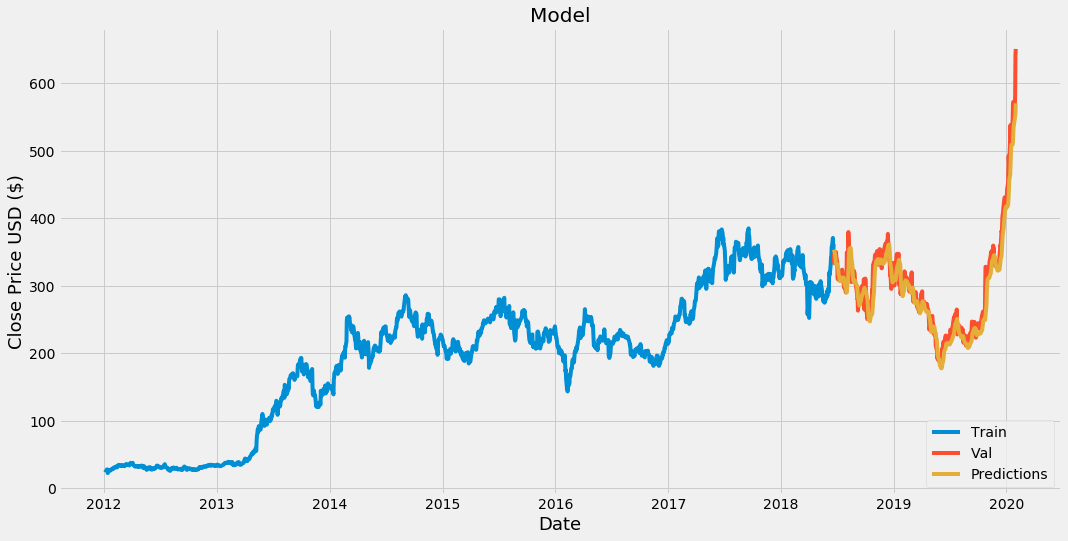

In [106]:
#Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [107]:
#Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2018-06-21,347.510010,353.504059
2018-06-22,333.630005,352.044189
2018-06-25,333.010010,346.546631
2018-06-26,342.000000,339.731750
2018-06-27,344.500000,334.837677
...,...,...
2020-01-27,558.020020,544.009094
2020-01-28,566.900024,548.119934
2020-01-29,580.989990,550.865479


In [108]:
#Get the quote
apple_quote = web.DataReader('ticker_symbol', data_source='yahoo', start='2012-01-01', end='2020-01-30')
#Create a new dataframe
new_df = apple_quote.filter(['Close'])
#Get teh last 60 day closing price values and convert the dataframe to an array
last_60_days = new_df[-60:].values
#Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
#Create an empty list
X_test = []
#Append teh past 60 days
X_test.append(last_60_days_scaled)
#Convert the X_test data set to a numpy array
X_test = np.array(X_test)
#Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
#Get the predicted scaled price
pred_price = model.predict(X_test)
#undo the scaling 
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[570.12646]]


In [109]:
#Get the quote
apple_quote2 = web.DataReader('ticker_symbol', data_source='yahoo', start='2020-01-30', end='2020-01-30')
print(apple_quote2['Close'])

Date
2020-01-30    640.809998
Name: Close, dtype: float64
